In [ ]:
  # Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#data generator

image_size = (180, 180)
batch_size = 32


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/CNN/utama/train',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/CNN/utama/train',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 13808 files belonging to 2 classes.
Using 11047 files for training.
Found 13808 files belonging to 2 classes.
Using 2761 files for validation.


In [ ]:
val_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
class_names = val_ds.class_names
print(class_names)

['COVID', 'Normal']


In [ ]:
class_names = train_ds.class_names
print(class_names)

['COVID', 'Normal']


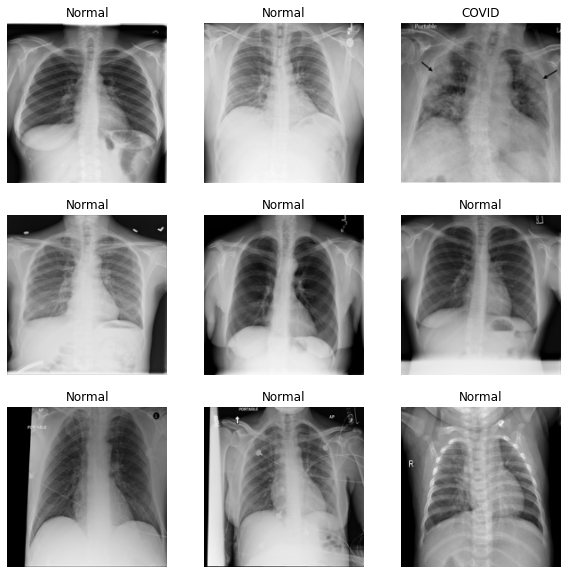

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.10)
    ]
)

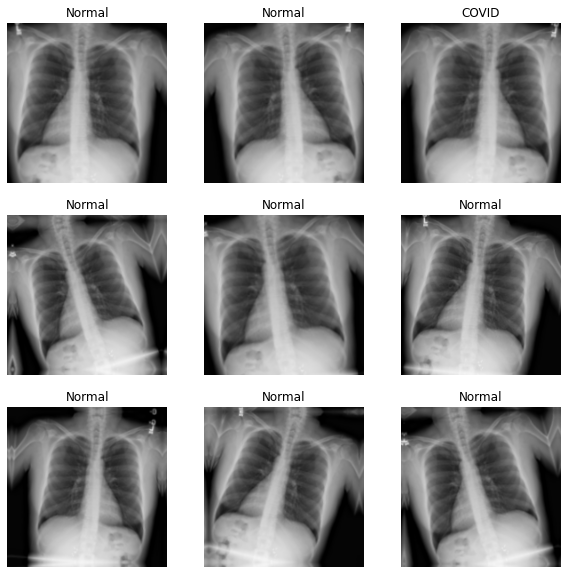

In [ ]:


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



In [ ]:


train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)



In [ ]:
import tensorflow as tf  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
model= Sequential()

model.add(Conv2D(kernel_size=(4,4), filters=32, activation='relu', input_shape=(180,180,3,)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(kernel_size=(4,4), filters=30, activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(2,activation = 'softmax'))  # the output layer

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 177, 177, 32)      1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 85, 85, 30)        15390     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 30)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 52920)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:


model.compile(loss = 'sparse_categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])


In [ ]:

history=model.fit(train_ds,  
          epochs = 20, 
          validation_data = val_ds,
          verbose=1)

Epoch 1/20
346/346 [==============================] - 98s 272ms/step - loss: 8.6512 - accuracy: 0.8438 - val_loss: 0.2324 - val_accuracy: 0.9008
Epoch 2/20
346/346 [==============================] - 58s 163ms/step - loss: 0.1951 - accuracy: 0.9226 - val_loss: 0.2006 - val_accuracy: 0.9163
Epoch 3/20
346/346 [==============================] - 55s 158ms/step - loss: 0.1839 - accuracy: 0.9267 - val_loss: 0.2233 - val_accuracy: 0.9124
Epoch 4/20
346/346 [==============================] - 55s 156ms/step - loss: 0.1186 - accuracy: 0.9566 - val_loss: 0.2256 - val_accuracy: 0.9243
Epoch 5/20
346/346 [==============================] - 54s 155ms/step - loss: 0.0956 - accuracy: 0.9671 - val_loss: 0.2539 - val_accuracy: 0.9029
Epoch 6/20
346/346 [==============================] - 55s 155ms/step - loss: 0.0867 - accuracy: 0.9683 - val_loss: 0.3273 - val_accuracy: 0.9171
Epoch 7/20
346/346 [==============================] - 54s 155ms/step - loss: 0.0560 - accuracy: 0.9793 - val_loss: 0.2823 - val_ac

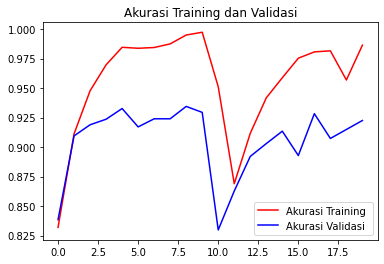

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

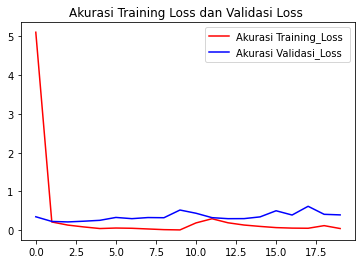

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Akurasi Training_Loss ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_loss, 'b', label='Akurasi Validasi_Loss')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training Loss dan Validasi Loss ')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

In [ ]:
image_path = "/content/drive/My Drive/random/Normal-1.png"
image_path2 = "/content/drive/My Drive/random/Normal-2.png"
image_path3 = "/content/drive/My Drive/random/Normal-3.png"
image_path4 = "/content/drive/My Drive/random/Normal-4.png"
image_path5 = "/content/drive/My Drive/random/Normal-22.png"
image_path6 = "/content/drive/My Drive/random/Normal-6.png"
image_path7 = "/content/drive/My Drive/random/Normal-7.png"
image_path8 = "/content/drive/My Drive/random/Normal-8.png"
image_path9= "/content/drive/My Drive/random/Normal-9.png"
image_path10 = "/content/drive/My Drive/random/Normal-10.png"
image_path11= "/content/drive/My Drive/random/Normal-11.png"
image_path12 = "/content/drive/My Drive/random/Normal-25.png"
image_path13 = "/content/drive/My Drive/random/Normal-13.png"
image_path14 = "/content/drive/My Drive/random/Normal-23.png"
image_path15 = "/content/drive/My Drive/random/Normal-15.png"
image_path16 = "/content/drive/My Drive/random/Normal-21.png"
image_path17 = "/content/drive/My Drive/random/Normal-17.png"
image_path18 = "/content/drive/My Drive/random/Normal-18.png"
image_path19 = "/content/drive/My Drive/random/Normal-19.png"
image_path20 = "/content/drive/My Drive/random/Normal-20.png"
merged_path = [image_path,image_path2,image_path3,image_path4,image_path5,image_path6,image_path7,image_path8,image_path9,image_path10,
               image_path11,image_path12,image_path13,image_path14,image_path15,image_path16,image_path17,image_path18,image_path19,image_path20]

for img_path in merged_path:
    img = keras.preprocessing.image.load_img(
        img_path, target_size=(180, 180))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    history = model.predict(img_array)
    score = tf.nn.softmax(history[0])
    
    print(
        "X-ray ini {} dengan kemungkinan {:.2f} persen."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))

X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 71.54 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 71.44 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 72.43 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 69.49 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.
X-ray ini Normal dengan kemungkinan 73.11 persen.


In [ ]:
image_path1 = "/content/drive/My Drive/random/COVID-1.png"
image_path2 = "/content/drive/My Drive/random/COVID-28.png"
image_path3 = "/content/drive/My Drive/random/COVID-3.png"
image_path4 = "/content/drive/My Drive/random/COVID-4.png"
image_path5 = "/content/drive/My Drive/random/COVID-26.png"
image_path6 = "/content/drive/My Drive/random/COVID-32.png"
image_path7 = "/content/drive/My Drive/random/COVID-7.png"
image_path8 = "/content/drive/My Drive/random/COVID-8.png"
image_path9 = "/content/drive/My Drive/random/COVID-21.png"
image_path10 = "/content/drive/My Drive/random/COVID-22.png"
image_path11 = "/content/drive/My Drive/random/COVID-11.png"
image_path12 = "/content/drive/My Drive/random/COVID-22.png"
image_path13 = "/content/drive/My Drive/random/COVID-24.png"
image_path14 = "/content/drive/My Drive/random/COVID-14.png"
image_path15 = "/content/drive/My Drive/random/COVID-15.png"
image_path16 = "/content/drive/My Drive/random/COVID-16.png"
image_path17 = "/content/drive/My Drive/random/COVID-17.png"
image_path18 = "/content/drive/My Drive/random/COVID-18.png"
image_path19 = "/content/drive/My Drive/random/COVID-19.png"
image_path20 = "/content/drive/My Drive/random/COVID-20.png"
merged_path = [image_path1,image_path2,image_path3,image_path4,image_path5,image_path6,image_path7,image_path8,image_path9,image_path10,
               image_path11,image_path12,image_path13,image_path14,image_path15,image_path16,image_path17,image_path18,image_path19,image_path20]

for img_path in merged_path:
    img = keras.preprocessing.image.load_img(
        img_path, target_size=(180, 180))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    history = model.predict(img_array)
    score = tf.nn.softmax(history[0])
    
    print(
        "X-ray ini {} dengan kemungkinan {:.2f} persen."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))

X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.10 persen.
X-ray ini COVID dengan kemungkinan 72.91 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
X-ray ini COVID dengan kemungkinan 73.11 persen.
